In [1]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.utils import img_to_array, array_to_img, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, NASNetLarge, MobileNetV2, InceptionV3,DenseNet121
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
import numpy as np
from tensorflow.keras.applications.inception_v3 import preprocess_input
from sklearn.metrics import accuracy_score, precision_score, recall_score
from tensorflow.keras.models import load_model
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image 
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
from skimage.util import random_noise
import os
from tqdm import tqdm
from PIL import Image


Densenet 121

In [2]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'


datagen = ImageDataGenerator(rescale=1./255)


batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224), 
    batch_size=batch_size,
    class_mode='categorical'  
)


Found 24528 images belonging to 4 classes.


In [3]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(data_generator.num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


num_epochs = 10
model.fit(data_generator, epochs=num_epochs,workers=8)


Epoch 1/10
767/767 [==============================] - 111s 132ms/step - loss: 0.3845 - accuracy: 0.8598
Epoch 2/10
767/767 [==============================] - 101s 131ms/step - loss: 0.2148 - accuracy: 0.9214
Epoch 3/10
767/767 [==============================] - 102s 133ms/step - loss: 0.1573 - accuracy: 0.9409
Epoch 4/10
767/767 [==============================] - 104s 135ms/step - loss: 0.1225 - accuracy: 0.9563
Epoch 5/10
767/767 [==============================] - 103s 134ms/step - loss: 0.1072 - accuracy: 0.9615
Epoch 6/10
767/767 [==============================] - 106s 138ms/step - loss: 0.0893 - accuracy: 0.9667
Epoch 7/10
767/767 [==============================] - 103s 133ms/step - loss: 0.0750 - accuracy: 0.9740
Epoch 8/10
767/767 [==============================] - 103s 134ms/step - loss: 0.0726 - accuracy: 0.9736
Epoch 9/10
767/767 [==============================] - 104s 136ms/step - loss: 0.0698 - accuracy: 0.9755
Epoch 10/10
767/767 [==============================] - 102s 133m

In [4]:
model.save('densenet121_model.h5')

In [5]:
from tensorflow.keras.models import load_model


In [6]:
loaded_model =load_model('densenet121_model.h5')
train_dir = 'C:/Users/Paras/ML/MONKE/AUG dataset'
validation_dir = 'C:/Users/Paras/ML/MONKE/validation'


train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',

)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',

)

X_test, y_true = next(validation_generator)


y_pred = loaded_model.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)


accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 24528 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
1/1 [==============================] - 2s 2s/step
Accuracy: 0.9688
Precision: 0.9714
Recall: 0.9688


Epoch 1/10
767/767 [==============================] - 111s 144ms/step - loss: 0.1209 - accuracy: 0.9566 - val_loss: 0.1454 - val_accuracy: 0.9705
Epoch 2/10
767/767 [==============================] - 107s 139ms/step - loss: 0.1038 - accuracy: 0.9622 - val_loss: 0.1460 - val_accuracy: 0.9617
Epoch 3/10
767/767 [==============================] - 108s 140ms/step - loss: 0.0907 - accuracy: 0.9677 - val_loss: 0.1743 - val_accuracy: 0.9676
Epoch 4/10
767/767 [==============================] - 108s 140ms/step - loss: 0.0926 - accuracy: 0.9678 - val_loss: 0.1832 - val_accuracy: 0.9676
Epoch 5/10
767/767 [==============================] - 106s 137ms/step - loss: 0.0822 - accuracy: 0.9708 - val_loss: 0.1461 - val_accuracy: 0.9735
Epoch 6/10
767/767 [==============================] - 105s 137ms/step - loss: 0.0789 - accuracy: 0.9717 - val_loss: 0.1635 - val_accuracy: 0.9676
Epoch 7/10
767/767 [==============================] - 107s 139ms/step - loss: 0.0753 - accuracy: 0.9734 - val_loss: 0.2077 -

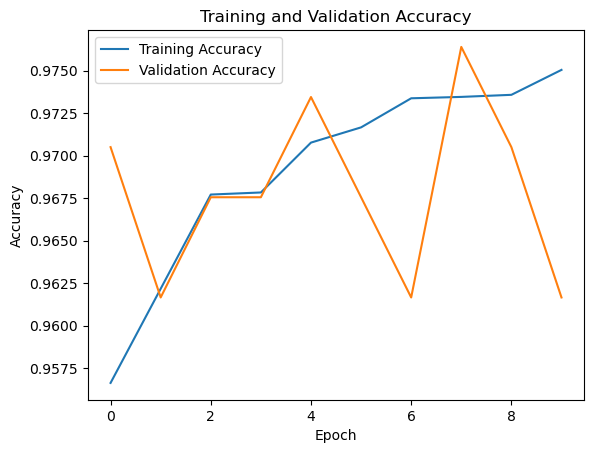

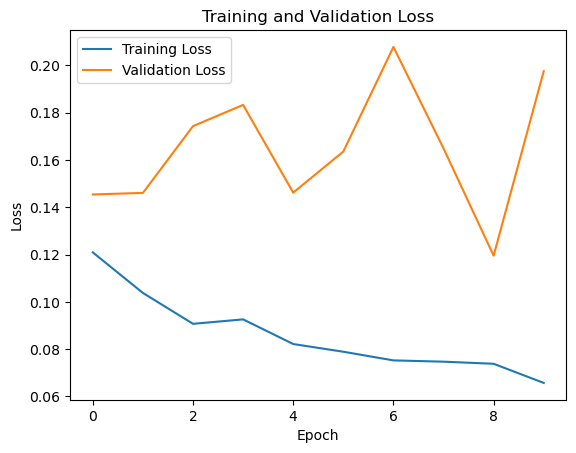

In [7]:
history = model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator,workers=8)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Common Parameters

In [11]:



dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  
)


batch_size = 32
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),  
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 19623 images belonging to 4 classes.
Found 0 images belonging to 4 classes.


InceptionV3

In [24]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'


datagen = ImageDataGenerator(rescale=1./255)


batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(299, 299),  
    batch_size=batch_size,
    class_mode='categorical'  
)

Found 24528 images belonging to 4 classes.


In [25]:

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))



for layer in base_model.layers:
    layer.trainable = False


model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_generator.num_classes, activation='softmax')
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train your model
num_epochs = 10
model.fit(train_generator, epochs=num_epochs, validation_data=validation_generator,workers=8)


Epoch 1/10
460/460 [==============================] - 100s 207ms/step - loss: 0.5035 - accuracy: 0.8112 - val_loss: 0.8982 - val_accuracy: 0.7068
Epoch 2/10
460/460 [==============================] - 89s 191ms/step - loss: 0.2965 - accuracy: 0.8871 - val_loss: 0.8695 - val_accuracy: 0.7594
Epoch 3/10
460/460 [==============================] - 92s 198ms/step - loss: 0.2341 - accuracy: 0.9117 - val_loss: 1.0444 - val_accuracy: 0.7143
Epoch 4/10
460/460 [==============================] - 91s 195ms/step - loss: 0.2011 - accuracy: 0.9243 - val_loss: 0.9247 - val_accuracy: 0.7143
Epoch 5/10
460/460 [==============================] - 91s 195ms/step - loss: 0.1774 - accuracy: 0.9326 - val_loss: 1.1066 - val_accuracy: 0.7218
Epoch 6/10
460/460 [==============================] - 90s 194ms/step - loss: 0.1641 - accuracy: 0.9395 - val_loss: 1.1308 - val_accuracy: 0.7594
Epoch 7/10
460/460 [==============================] - 88s 190ms/step - loss: 0.1470 - accuracy: 0.9418 - val_loss: 1.2989 - val_a

In [26]:


loaded_model = load_model('InceptionV3_model.h5', compile=False)

train_dir = 'C:/Users/Paras/ML/MONKE/AUG dataset'
validation_dir = 'C:/Users/Paras/ML/MONKE/validation'
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.4)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(299, 299),  
    batch_size=32,
    class_mode='categorical',
    subset='training' 
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(299, 299),  
    batch_size=32,
    class_mode='categorical',
    subset='validation'  
)

X_val, y_true = next(validation_generator)


X_val_resized = np.array([image.img_to_array(image.array_to_img(img, scale=False).resize((299, 299))) for img in X_val])


X_val_resized = preprocess_input(X_val_resized)


y_pred = loaded_model.predict(X_val_resized)


y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)


accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 14717 images belonging to 4 classes.
Found 133 images belonging to 4 classes.
1/1 [==============================] - 1s 1s/step
Accuracy: 0.2188
Precision: 0.0479
Recall: 0.2188


C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Epoch 1/10
460/460 [==============================] - 93s 199ms/step - loss: 0.1255 - accuracy: 0.9535 - val_loss: 1.3667 - val_accuracy: 0.7143
Epoch 2/10
460/460 [==============================] - 91s 196ms/step - loss: 0.1169 - accuracy: 0.9578 - val_loss: 1.2002 - val_accuracy: 0.7444
Epoch 3/10
460/460 [==============================] - 91s 196ms/step - loss: 0.1169 - accuracy: 0.9556 - val_loss: 1.2920 - val_accuracy: 0.7669
Epoch 4/10
460/460 [==============================] - 91s 195ms/step - loss: 0.1125 - accuracy: 0.9571 - val_loss: 1.6661 - val_accuracy: 0.6692
Epoch 5/10
460/460 [==============================] - 89s 192ms/step - loss: 0.1078 - accuracy: 0.9609 - val_loss: 1.4661 - val_accuracy: 0.7368
Epoch 6/10
460/460 [==============================] - 87s 188ms/step - loss: 0.1108 - accuracy: 0.9591 - val_loss: 1.8007 - val_accuracy: 0.7143
Epoch 7/10
460/460 [==============================] - 89s 190ms/step - loss: 0.0981 - accuracy: 0.9634 - val_loss: 1.4607 - val_ac

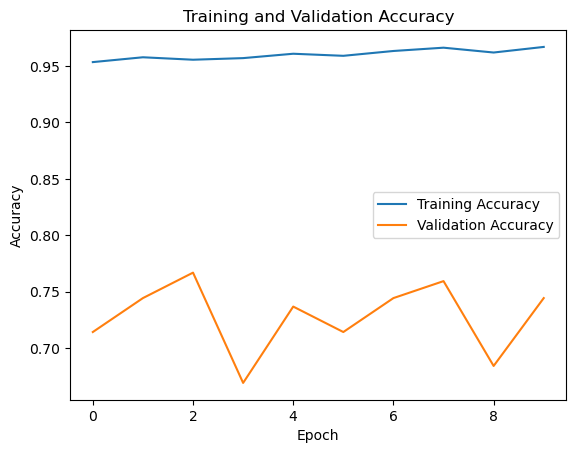

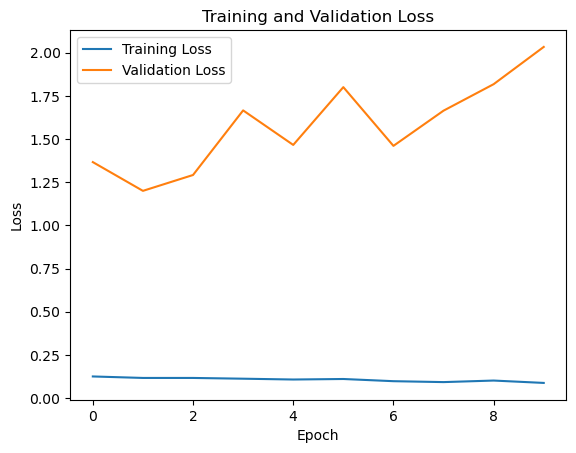

In [27]:


history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    workers=8 
    # Make sure to provide validation data here
)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # This line should work now
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()




MobilenetV2

In [3]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'

# Create a data generator without additional augmentation (you can adjust parameters as needed)
datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator
batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust the target size as needed
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create your custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Adjust num_classes based on your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Train your model
num_epochs = 10
model.fit(data_generator, epochs=num_epochs,workers=8)


Found 24528 images belonging to 4 classes.
Epoch 1/10
767/767 [==============================] - 53s 64ms/step - loss: 0.3427 - accuracy: 0.8748
Epoch 2/10
767/767 [==============================] - 48s 63ms/step - loss: 0.1520 - accuracy: 0.9440
Epoch 3/10
767/767 [==============================] - 47s 61ms/step - loss: 0.1114 - accuracy: 0.9587
Epoch 4/10
767/767 [==============================] - 48s 63ms/step - loss: 0.0819 - accuracy: 0.9710
Epoch 5/10
767/767 [==============================] - 48s 62ms/step - loss: 0.0727 - accuracy: 0.9732
Epoch 6/10
767/767 [==============================] - 47s 62ms/step - loss: 0.0641 - accuracy: 0.9775
Epoch 7/10
767/767 [==============================] - 47s 62ms/step - loss: 0.0638 - accuracy: 0.9775
Epoch 8/10
767/767 [==============================] - 47s 61ms/step - loss: 0.0593 - accuracy: 0.9791
Epoch 9/10
767/767 [==============================] - 48s 63ms/step - loss: 0.0495 - accuracy: 0.9818
Epoch 10/10
767/767 [==================

In [6]:
model.save('MobilenetV2_model.h5')
loaded_model =load_model('MobilenetV2_model.h5')

train_dir = 'C:/Users/Paras/ML/MONKE/AUG dataset'
validation_dir = 'C:/Users/Paras/ML/MONKE/validation'
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

# Load your data with a validation split
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset for training data
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Don't shuffle for evaluation
)

# Get predictions
X_test, y_true = next(validation_generator)
y_pred = loaded_model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 24528 images belonging to 4 classes.
Found 339 images belonging to 4 classes.
1/1 [==============================] - 1s 641ms/step
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000


Epoch 1/10
767/767 [==============================] - 60s 77ms/step - loss: 0.1203 - accuracy: 0.9581 - val_loss: 0.1914 - val_accuracy: 0.9499
Epoch 2/10
767/767 [==============================] - 61s 79ms/step - loss: 0.0984 - accuracy: 0.9642 - val_loss: 0.1681 - val_accuracy: 0.9558
Epoch 3/10
767/767 [==============================] - 60s 78ms/step - loss: 0.0845 - accuracy: 0.9703 - val_loss: 0.1637 - val_accuracy: 0.9587
Epoch 4/10
767/767 [==============================] - 59s 77ms/step - loss: 0.0748 - accuracy: 0.9741 - val_loss: 0.2191 - val_accuracy: 0.9410
Epoch 5/10
767/767 [==============================] - 61s 79ms/step - loss: 0.0783 - accuracy: 0.9740 - val_loss: 0.1742 - val_accuracy: 0.9528
Epoch 6/10
767/767 [==============================] - 62s 81ms/step - loss: 0.0622 - accuracy: 0.9775 - val_loss: 0.2487 - val_accuracy: 0.9410
Epoch 7/10
767/767 [==============================] - 64s 84ms/step - loss: 0.0680 - accuracy: 0.9755 - val_loss: 0.2012 - val_accuracy:

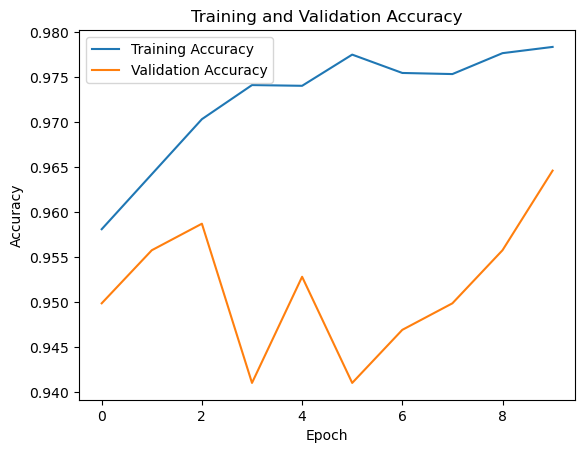

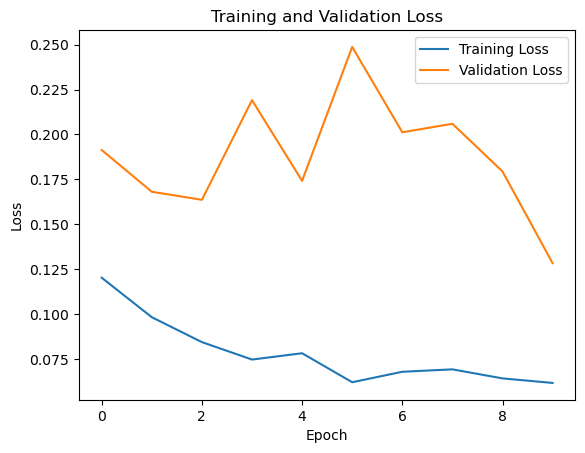

In [7]:

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    workers=8 # Make sure to provide validation data here
)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



NasNetLarge

In [36]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'

# Create a data generator without additional augmentation (you can adjust parameters as needed)
datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator
batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(331, 331),  # Adjust the target size as needed
    batch_size=batch_size,
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)

base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(331, 331, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create your custom classification head
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Adjust num_classes based on your dataset
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 10
model.fit(data_generator, epochs=num_epochs,workers=8)


Found 24528 images belonging to 4 classes.
Epoch 1/10


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_6/NASNet/stem_bn1/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\Paras\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Paras\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Paras\AppData\Local\Temp\ipykernel_50452\3625839269.py", line 34, in <module>
      model.fit(data_generator, epochs=num_epochs,workers=8)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1564, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1160, in train_function
      return step_function(self, iterator)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1146, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1135, in run_step
      outputs = model.train_step(data)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 993, in train_step
      y_pred = self(x, training=True)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_6/NASNet/stem_bn1/FusedBatchNormV3'
OOM when allocating tensor with shape[32,96,165,165] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_6/NASNet/stem_bn1/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_563690]

In [35]:
model.save('NasNetLarge_model.h5')
loaded_model =load_model('NasNetLarge_model.h5')


train_dir = 'C:/Users/Paras/ML/MONKE/AUG dataset'
validation_dir = 'C:/Users/Paras/ML/MONKE/validation'
datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.4)

# Load your data with a validation split
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(331, 331),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset for training data
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
     target_size=(331, 331),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation subset for validation data
)

X_test, y_true = next(validation_generator)

# Get predictions
y_pred = loaded_model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Found 14717 images belonging to 4 classes.
Found 133 images belonging to 4 classes.


ResourceExhaustedError: Graph execution error:

Detected at node 'sequential_5/NASNet/stem_bn1/FusedBatchNormV3' defined at (most recent call last):
    File "C:\Users\Paras\anaconda3\envs\tf\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\Paras\anaconda3\envs\tf\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
      app.start()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelapp.py", line 736, in start
      self.io_loop.start()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\tornado\platform\asyncio.py", line 195, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\base_events.py", line 601, in run_forever
      self._run_once()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\base_events.py", line 1905, in _run_once
      handle._run()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue
      await self.process_one()
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one
      await dispatch(*args)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell
      await result
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request
      reply_content = await reply_content
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute
      res = shell.run_cell(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell
      return super().run_cell(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell
      result = self._run_cell(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell
      result = runner(coro)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Paras\AppData\Local\Temp\ipykernel_50452\2616449202.py", line 29, in <module>
      y_pred = loaded_model.predict(X_test)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2253, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2041, in predict_function
      return step_function(self, iterator)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2027, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 2015, in run_step
      outputs = model.predict_step(data)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 1983, in predict_step
      return self(x, training=False)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\sequential.py", line 410, in call
      return super().call(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\training.py", line 557, in __call__
      return super().__call__(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 510, in call
      return self._run_internal_graph(inputs, training=training, mask=mask)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\functional.py", line 667, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\engine\base_layer.py", line 1097, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 96, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 850, in call
      outputs = self._fused_batch_norm(inputs, training=training)
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 660, in _fused_batch_norm
      output, mean, variance = control_flow_util.smart_cond(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\utils\control_flow_util.py", line 108, in smart_cond
      return tf.__internal__.smart_cond.smart_cond(
    File "C:\Users\Paras\anaconda3\envs\tf\lib\site-packages\keras\layers\normalization\batch_normalization.py", line 649, in _fused_batch_norm_inference
      return tf.compat.v1.nn.fused_batch_norm(
Node: 'sequential_5/NASNet/stem_bn1/FusedBatchNormV3'
OOM when allocating tensor with shape[32,96,165,165] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node sequential_5/NASNet/stem_bn1/FusedBatchNormV3}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_509564]

In [ ]:

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    workers=8
)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()



VGG16

In [ ]:
dataset_path = 'C:/Users/Paras/ML/MONKE/AUG dataset'

# Create a data generator without additional augmentation (you can adjust parameters as needed)
datagen = ImageDataGenerator(rescale=1./255)

# Create a data generator
batch_size = 32
data_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=(224, 224),  # Adjust the target size
    batch_size=10,  # Adjust the batch size
    class_mode='categorical'
)


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

# Create your custom classification head
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(4, activation='softmax')  # Adjust num_classes based on your dataset
])


# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

num_epochs = 10
model.fit(data_generator, epochs=num_epochs,workers=8)



Found 24528 images belonging to 4 classes.
Epoch 1/10
2453/2453 [==============================] - 609s 243ms/step - loss: 1.0986 - accuracy: 0.6036
Epoch 2/10
2453/2453 [==============================] - 590s 241ms/step - loss: 0.8551 - accuracy: 0.6495
Epoch 3/10
 390/2453 [===>..........................] - ETA: 8:16 - loss: 0.8119 - accuracy: 0.6790

In [ ]:
model.save('VGG16_model.h5')
loaded_model =load_model('VGG16_model.h5')

# Load your data with a validation split
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use training subset for training data
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use validation subset for validation data
)

X_test, y_true = next(validation_generator)

# Get predictions
y_pred = loaded_model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_true, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true_classes, y_pred_classes)
precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
recall = recall_score(y_true_classes, y_pred_classes, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


In [ ]:
history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=validation_generator,
    workers=8
)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
